# Project 

## Bitcoin Predictor

Pull in the cryptocurrency listing from coingecko

In [5]:
import requests
import pandas as pd

coin_list_api = 'https://api.coingecko.com/api/v3/coins/list'

coin_data = requests.get(coin_list_api)

Find out if the connection has been succesful or not

Parse the results into a json file 

In [6]:
coin_json = coin_data.json()

In [7]:
coin_df = pd.DataFrame(coin_json)

In [8]:
coin_df.head()

,id,name,symbol
0,01coin,01coin,zoc
1,02-token,O2 Token,o2t
2,0chain,0chain,zcn
3,0x,0x,zrx
4,0xcert,0xcert,zxc


In [9]:
coin_df.set_index(coin_df['id'], inplace=True)
del coin_df['id']
coin_df.head()

,name,symbol
id,,
01coin,01coin,zoc
02-token,O2 Token,o2t
0chain,0chain,zcn
0x,0x,zrx
0xcert,0xcert,zxc


In [10]:
coin_df.loc['dogecoin']

name      Dogecoin
symbol        doge
Name: dogecoin, dtype: object

In [11]:
coin_df.loc['bitcoin']

name      Bitcoin
symbol        btc
Name: bitcoin, dtype: object

### Now we'll grab the dogecoin market data and price history!

In [13]:
dogecoin = 'https://api.coingecko.com/api/v3/coins/dogecoin/market_chart?vs_currency=USD&days=120'

In [14]:
doge_coin = requests.get(dogecoin)
doge_json = doge_coin.json()
type(doge_json)

dict

In [15]:
doge_json.keys()

dict_keys(['prices', 'market_caps', 'total_volumes'])

In [16]:
doge_prices = doge_json['prices']

In [17]:
type(doge_prices)

list

In [18]:
doge_prices[0] # hmm, don't understand this, let's pass it to a df!

[1546300800000, 0.002340923789792248]

In [19]:
doge_df = pd.DataFrame(doge_prices, columns=['DateTime', 'Prices'])
doge_df.head()

,DateTime,Prices
0,1546300800000,0.002341
1,1546387200000,0.002365
2,1546473600000,0.002354
3,1546560000000,0.002302
4,1546646400000,0.002260


In [20]:
doge_df.shape

(121, 2)

First column is probably a raw data time column! and the other is price

In [21]:
doge_df['DateTime'] = pd.to_datetime(doge_df['DateTime'], unit='ms') 
doge_df.head()

,DateTime,Prices
0,2019-01-01,0.002341
1,2019-01-02,0.002365
2,2019-01-03,0.002354
3,2019-01-04,0.002302
4,2019-01-05,0.002260


Calculate a rolling mean value by taking the prices column, the last 28 values(days), and calculating the average for those 28 values, finally filling the first 28 (blank) values with the value from the first mean value

In [22]:
doge_df['rolling_mean_price'] = doge_df['Prices'].rolling(28).mean().fillna(method='bfill')

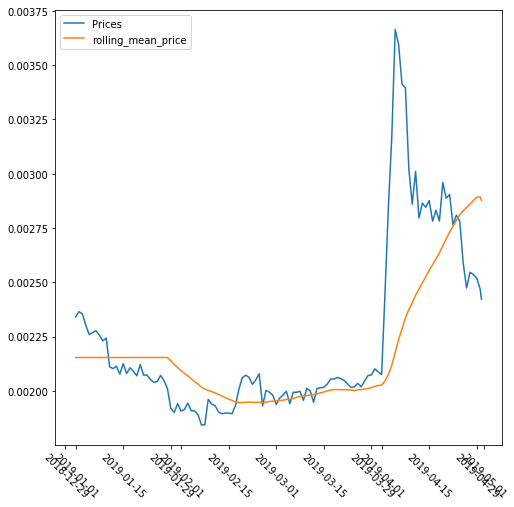

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.plot(doge_df['DateTime'], doge_df['Prices'])
plt.plot(doge_df['DateTime'], doge_df['rolling_mean_price'])

plt.xticks(rotation=-45)
plt.legend()

## Let's work on finding markets data for 10 bitcoins

This is essentially all the steps to get the cryptocurrency data 

In [37]:
bitcoin = 'https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=USD&days=365'

bit_coin = requests.get(bitcoin)
bit_json = bit_coin.json()

In [84]:
bitcoin_prices = bit_json['prices']

bitcoin_df = pd.DataFrame(bitcoin_prices, columns=['DateTime', 'Prices'])


bitcoin_df['DateTime'] = pd.to_datetime(bitcoin_df['DateTime'], unit='ms') 

bitcoin_df['rolling_mean_price'] = bitcoin_df['Prices'].rolling(28).mean().fillna(method='bfill')

bitcoin_df.head()

,DateTime,Prices,rolling_mean_price
0,2018-04-30,9325.628851,8647.664809
1,2018-05-01,9198.189510,8647.664809
2,2018-05-02,9024.387512,8647.664809
3,2018-05-03,9122.653014,8647.664809
4,2018-05-04,9551.135184,8647.664809


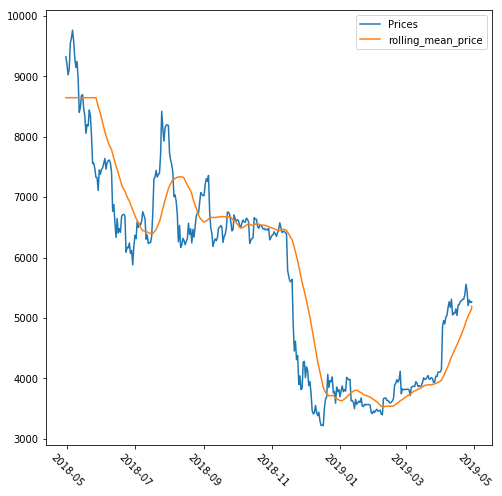

In [85]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
plt.plot(bitcoin_df['DateTime'], bitcoin_df['Prices'])
plt.plot(bitcoin_df['DateTime'], bitcoin_df['rolling_mean_price'])

plt.xticks(rotation=-45)
plt.legend()

In [24]:
cryptocurrencies = ('bitcoin', 'ethereum', 'litecoin', 'zcash', 'dash', 'ripple', 'monero', 'neo', 'cardano', 'eos')
cryptocurrencies

('bitcoin',
 'ethereum',
 'litecoin',
 'zcash',
 'dash',
 'ripple',
 'monero',
 'neo',
 'cardano',
 'eos')

Let's write a function to iterate through our market data!

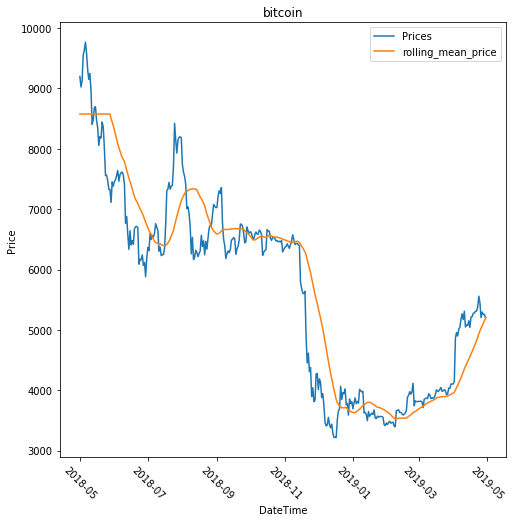

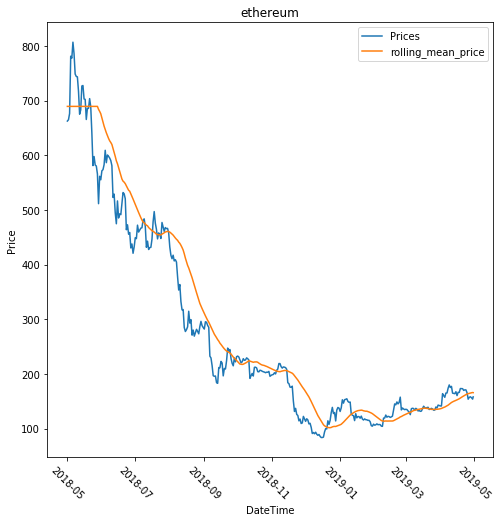

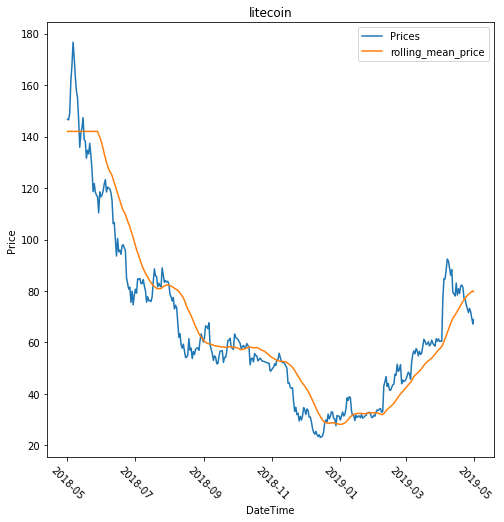

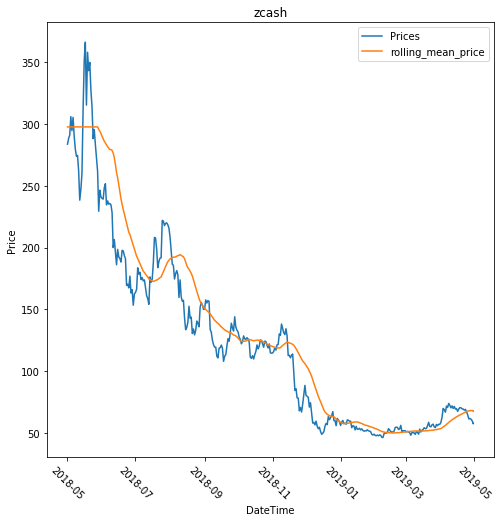

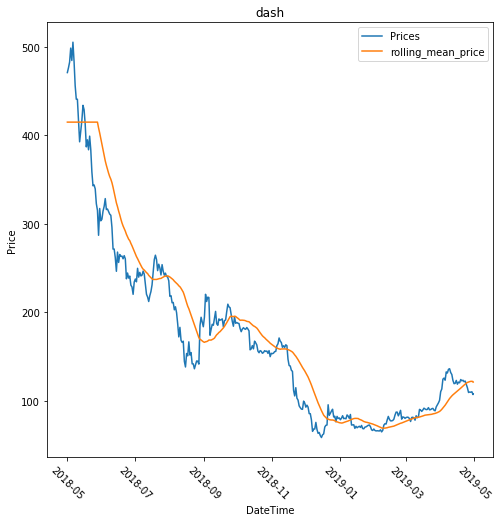

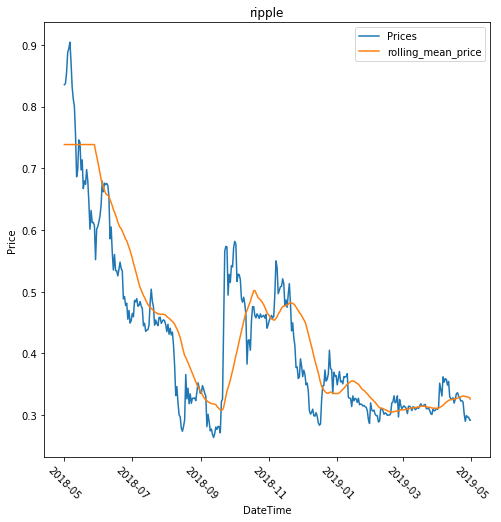

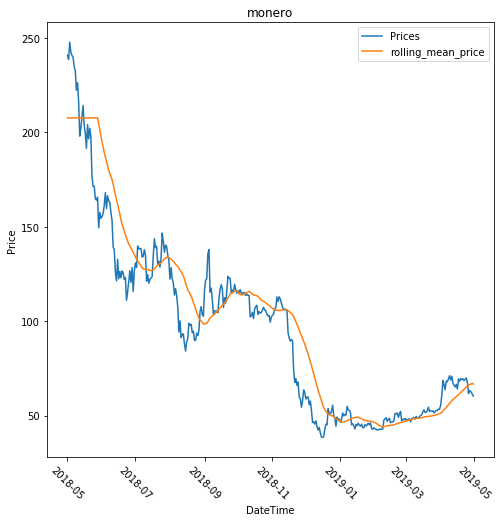

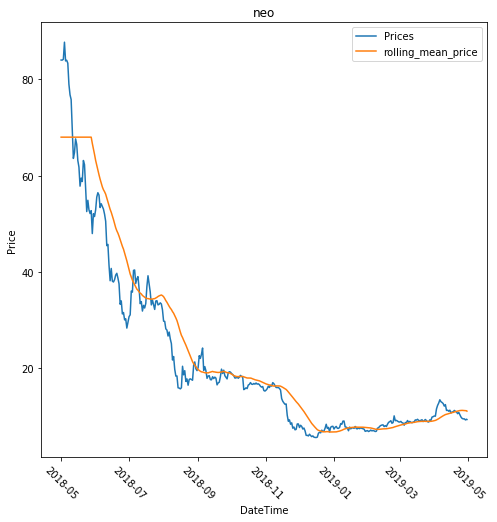

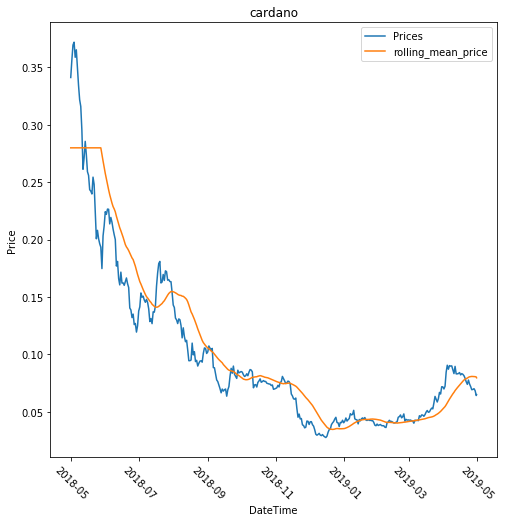

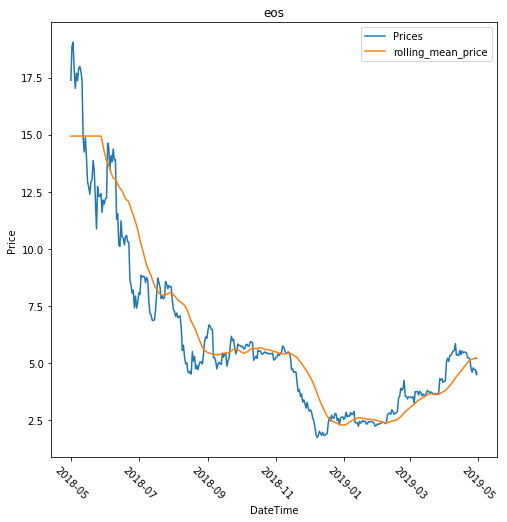

In [29]:
def market_data(cryptocurrencies):
    
    for c in cryptocurrencies:

        crypto = f'https://api.coingecko.com/api/v3/coins/{c}/market_chart?vs_currency=USD&days=365'

        crypto_request = requests.get(crypto)
        crypto_json = crypto_request.json()

        crypto_prices = crypto_json['prices']

        crypto_df = pd.DataFrame(crypto_prices, columns=['DateTime', 'Prices'])

        crypto_df['DateTime'] = pd.to_datetime(crypto_df['DateTime'], unit='ms') 
    
        crypto_df['rolling_mean_price'] = crypto_df['Prices'].rolling(28).mean().fillna(method='bfill')
    
        plt.figure(figsize=(8,8))
        plt.plot(crypto_df['DateTime'], crypto_df['Prices'])
        plt.plot(crypto_df['DateTime'], crypto_df['rolling_mean_price'])
        
        plt.xlabel('DateTime')
        plt.ylabel('Price')
        plt.title(f'{c}')
        plt.xticks(rotation=-45)
        plt.legend()
            
market_data(cryptocurrencies)

In [30]:
def market_data_single(c):
        
        crypto = f'https://api.coingecko.com/api/v3/coins/{c}/market_chart?vs_currency=USD&days=365'

        crypto_request = requests.get(crypto)
        crypto_json = crypto_request.json()

        crypto_prices = crypto_json['prices']

        crypto_df = pd.DataFrame(crypto_prices, columns=['DateTime', f'{c}_Prices'])

        crypto_df['DateTime'] = pd.to_datetime(crypto_df['DateTime'], unit='ms') 
        
        crypto_df[f'{c}_rolling_mean_price'] = crypto_df[f'{c}_Prices'].rolling(28).mean().fillna(method='bfill')
        
        return crypto_df

In [31]:
market_data_single('bitcoin').set_index('DateTime').head()

,bitcoin_Prices,bitcoin_rolling_mean_price
DateTime,,
2018-05-01,9198.189510,8576.272491
2018-05-02,9024.387512,8576.272491
2018-05-03,9122.653014,8576.272491
2018-05-04,9551.135184,8576.272491
2018-05-05,9634.538226,8576.272491


In [35]:
def market_data_multiple_coins(c):

    bob = []
    
    for c in cryptocurrencies:
    
        crypto = f'https://api.coingecko.com/api/v3/coins/{c}/market_chart?vs_currency=USD&days=365'

        crypto_request = requests.get(crypto)
        crypto_json = crypto_request.json()

        crypto_prices = crypto_json['prices']

        crypto_df = pd.DataFrame(crypto_prices, columns=['DateTime', f'{c}_Prices'])

        crypto_df['DateTime'] = pd.to_datetime(crypto_df['DateTime'], unit='ms') 

        bob.append(crypto_df)
    
    
    
    merged_df = bob[0].merge(bob[1], on='DateTime', how='left')
    
    merged_df = merged_df.merge(bob[2], on='DateTime', how='left')

    merged_df = merged_df.merge(bob[3], on='DateTime', how='left')

    merged_df = merged_df.merge(bob[4], on='DateTime', how='left')

    merged_df = merged_df.merge(bob[5], on='DateTime', how='left')
    
    merged_df.set_index('DateTime', inplace=True)
        
    return merged_df
    
market_data_multiple_coins(cryptocurrencies)

,bitcoin_Prices,ethereum_Prices,litecoin_Prices,zcash_Prices,dash_Prices,ripple_Prices
DateTime,,,,,,
2018-05-01 00:00:00,9198.189510,662.732736,146.731182,283.617198,470.890638,0.835343
2018-05-02 00:00:00,9024.387512,665.225786,146.524008,288.182337,476.331497,0.837300
2018-05-03 00:00:00,9122.653014,676.552564,149.147249,290.851705,482.670703,0.855396
2018-05-04 00:00:00,9551.135184,781.425780,161.357548,305.875168,498.555920,0.887599
2018-05-05 00:00:00,9634.538226,777.907647,167.610746,294.558702,484.561260,0.893844
2018-05-06 00:00:00,9766.244485,807.067329,176.705886,305.265067,505.235651,0.904192
2018-05-07 00:00:00,9583.871746,785.892744,170.796217,290.347182,483.575065,0.871526
2018-05-08 00:00:00,9308.265026,748.813141,163.329153,279.761388,456.174570,0.831379
2018-05-09 00:00:00,9149.517833,744.324826,157.855124,273.882240,440.800332,0.812259


## Feature Engineering

In this case, X data is price and y data is price, they are the same data.

The difference is that you're looking at past X price to predict future y price.

For each date you're going to give your model a series of different X info, shifted X prices, rolling means, other currencies

So for each date you'll have a set of X data...